<a href="https://colab.research.google.com/github/KHUSH445/ML_LAB/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets


In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data?select=heart.csv")

Skipping, found downloaded files in "./heart-failure-prediction" (use force=True to force download)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
import opendatasets as od
df = pd.read_csv('heart-failure-prediction/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [2]:
from google.colab import files
files.upload()


Saving heart.csv to heart.csv


{'heart.csv': b'Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease\n40,M,ATA,140,289,0,Normal,172,N,0,Up,0\n49,F,NAP,160,180,0,Normal,156,N,1,Flat,1\n37,M,ATA,130,283,0,ST,98,N,0,Up,0\n48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1\n54,M,NAP,150,195,0,Normal,122,N,0,Up,0\n39,M,NAP,120,339,0,Normal,170,N,0,Up,0\n45,F,ATA,130,237,0,Normal,170,N,0,Up,0\n54,M,ATA,110,208,0,Normal,142,N,0,Up,0\n37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1\n48,F,ATA,120,284,0,Normal,120,N,0,Up,0\n37,F,NAP,130,211,0,Normal,142,N,0,Up,0\n58,M,ATA,136,164,0,ST,99,Y,2,Flat,1\n39,M,ATA,120,204,0,Normal,145,N,0,Up,0\n49,M,ASY,140,234,0,Normal,140,Y,1,Flat,1\n42,F,NAP,115,211,0,ST,137,N,0,Up,0\n54,F,ATA,120,273,0,Normal,150,N,1.5,Flat,0\n38,M,ASY,110,196,0,Normal,166,N,0,Flat,1\n43,F,ATA,120,201,0,Normal,165,N,0,Up,0\n60,M,ASY,100,248,0,Normal,125,N,1,Flat,1\n36,M,ATA,120,267,0,Normal,160,N,3,Flat,1\n43,F,TA,100,223,0,Normal,142,N,0,Up,0\n44,M,ATA,120,184,0

In [ ]:
!kaggle datasets download -d fedesoriano/heart-failure-prediction
!unzip heart-failure-prediction.zip


In [4]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('heart.csv')

# Preview
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
# Dataset summary
df.info()
# Statistical summary
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
# Check class balance
df['HeartDisease'].value_counts()

,count
HeartDisease,
1,508
0,410


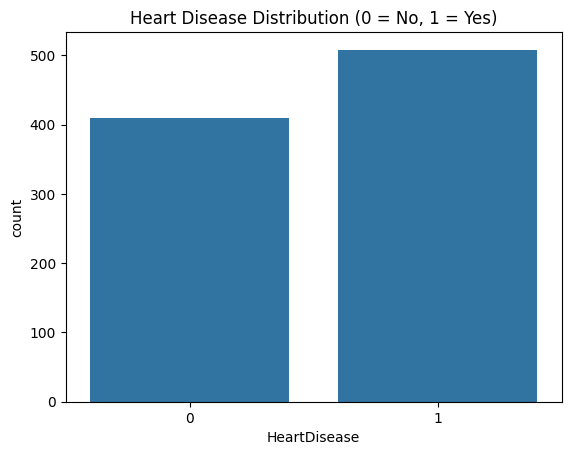

In [7]:
# Visualize class distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='HeartDisease', data=df)
plt.title("Heart Disease Distribution (0 = No, 1 = Yes)")
plt.show()


In [8]:
# Features = all columns except 'HeartDisease'
X = df.drop('HeartDisease', axis=1)

# Target = HeartDisease
y = df['HeartDisease']


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [10]:
df.dtypes


,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


In [11]:
df_encoded = pd.get_dummies(df, drop_first=True)  # drop_first to avoid dummy variable trap


In [12]:
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
from sklearn.linear_model import LogisticRegression

# Create the model
model = LogisticRegression()

# Train the model
model.fit(X_train_scaled, y_train)


LogisticRegression()

 Accuracy: 0.8533 (85.33%)

 Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



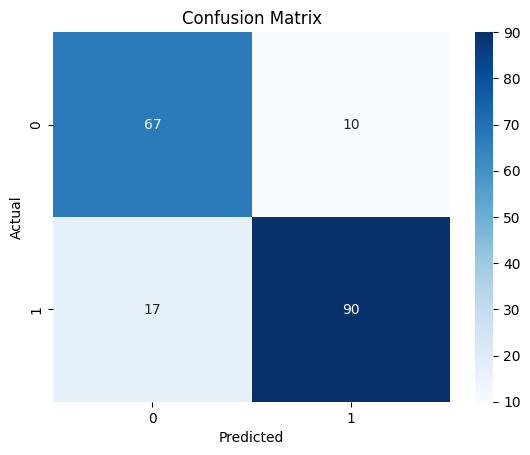

In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f" Accuracy: {accuracy:.4f} ({accuracy * 100:.2f}%)")

# Classification report
print("\n Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [16]:
# Dataset summary
df.info()
# Statistical summary
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [17]:
# Check class balance
df['HeartDisease'].value_counts()

,count
HeartDisease,
1,508
0,410


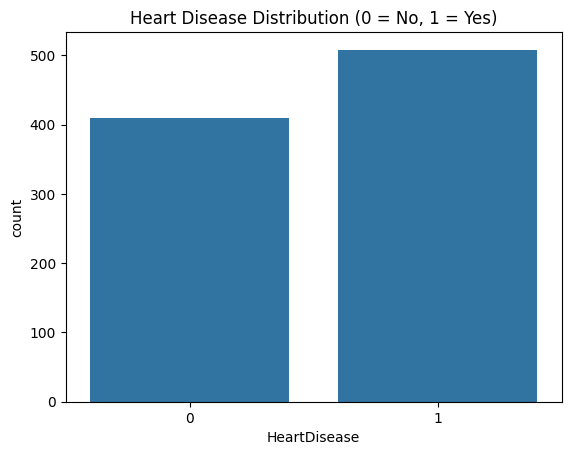

In [18]:
# Visualize class distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='HeartDisease', data=df)
plt.title("Heart Disease Distribution (0 = No, 1 = Yes)")
plt.show()

In [ ]:
# Features = all columns except 'HeartDisease'
X = df.drop('HeartDisease', axis=1)

# Target = HeartDisease
y = df['HeartDisease']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
df.dtypes

In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)  # drop_first to avoid dummy variable trap

In [ ]:
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
from sklearn.linear_model import LogisticRegression

# Create the model
model = LogisticRegression()

# Train the model
model.fit(X_train_scaled, y_train)

LogisticRegression()

 Accuracy: 0.8533 (85.33%)

 Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



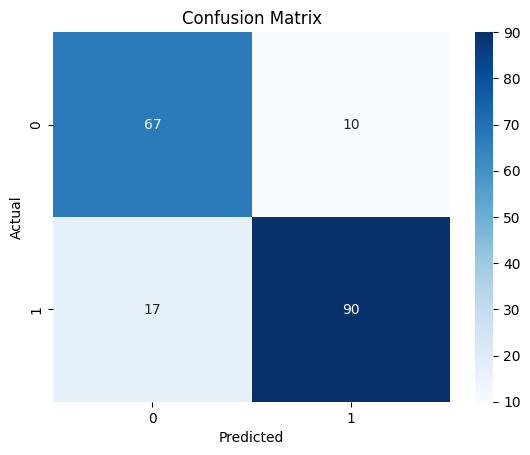

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f" Accuracy: {accuracy:.4f} ({accuracy * 100:.2f}%)")

# Classification report
print("\n Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()